# Credit Risk Analyst

In [1]:
library("openxlsx")
library("C50")

In [2]:
#Mempersiapkan data
dataCreditRating <- read.xlsx(xlsxFile = "https://storage.googleapis.com/dqlab-dataset/credit_scoring_dqlab.xlsx")

In [3]:
#Mempersiapkan class dan input variables 
dataCreditRating$risk_rating <- as.factor(dataCreditRating$risk_rating) 
input_columns <- c("durasi_pinjaman_bulan", "jumlah_tanggungan")
datafeed <- dataCreditRating[ , input_columns ]

In [4]:
#Mempersiapkan training dan testing set
set.seed(100) #untuk menyeragamkan hasil random antar tiap komputer
indeks_training_set <- sample(900, 800)

In [5]:
#Membuat dan menampilkan training set dan testing set
input_training_set <- datafeed[indeks_training_set,]
class_training_set <- dataCreditRating[indeks_training_set,]$risk_rating
input_testing_set <- datafeed[-indeks_training_set,]


Call:
C5.0.default(x = input_training_set, y = class_training_set)


C5.0 [Release 2.07 GPL Edition]  	Wed Jun 15 21:15:52 2022
-------------------------------

Class specified by attribute `outcome'

Read 800 cases (3 attributes) from undefined.data

Decision tree:

jumlah_tanggungan > 4:
:...durasi_pinjaman_bulan <= 24: 4 (105/30)
:   durasi_pinjaman_bulan > 24: 5 (120/51)
jumlah_tanggungan <= 4:
:...jumlah_tanggungan > 2: 3 (216/20)
    jumlah_tanggungan <= 2:
    :...durasi_pinjaman_bulan <= 36: 1 (264/80)
        durasi_pinjaman_bulan > 36:
        :...jumlah_tanggungan <= 0: 2 (37/7)
            jumlah_tanggungan > 0: 3 (58/4)


Evaluation on training data (800 cases):

	    Decision Tree   
	  ----------------  
	  Size      Errors  

	     6  192(24.0%)   <<


	   (a)   (b)   (c)   (d)   (e)    <-classified as
	  ----  ----  ----  ----  ----
	   184     2     5     6     6    (a): class 1
	    80    30    19     6    11    (b): class 2
	           3   250                (c): c

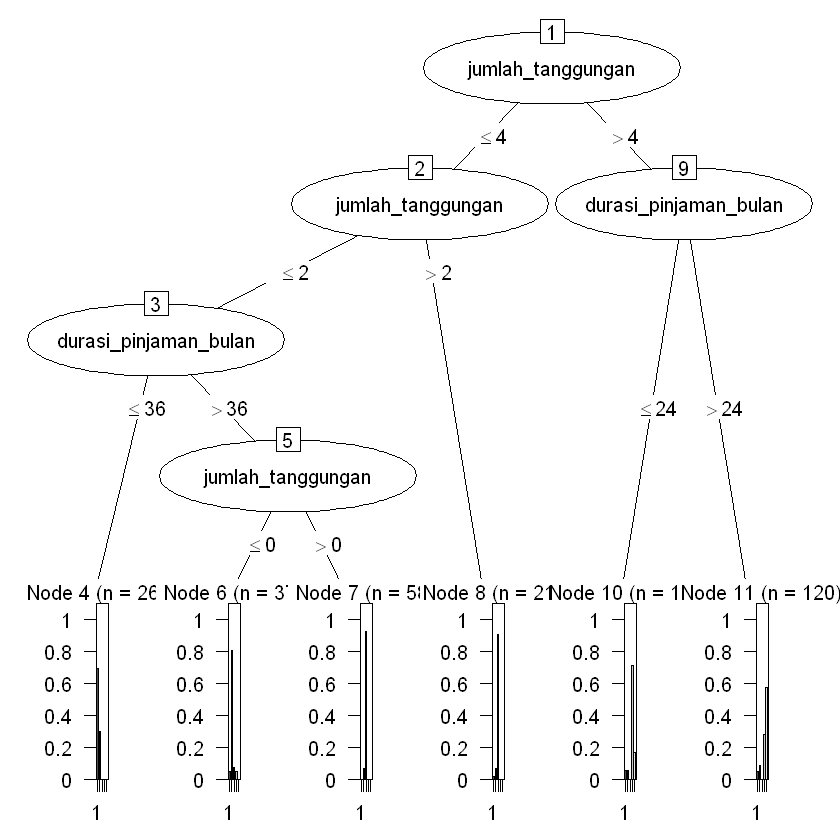

In [11]:
#menghasilkan dan menampilkan summary model
risk_rating_model <- C5.0(input_training_set, class_training_set)
summary(risk_rating_model)


plot(risk_rating_model)


In [7]:
#Membuat data frame aplikasi baru
aplikasi_baru <- data.frame(jumlah_tanggungan = 6, durasi_pinjaman_bulan = 64)

In [8]:
#melakukan prediksi
predict(risk_rating_model, aplikasi_baru)

[1] 5
Levels: 1 2 3 4 5

In [ ]:
# RESULT : Jika durasi pinjaman sampai dgn 64 bulan, maka risk ratingnya adalah 4